In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display, HTML

In [6]:
data = pd.read_csv('./documents/Titanic-Dataset.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


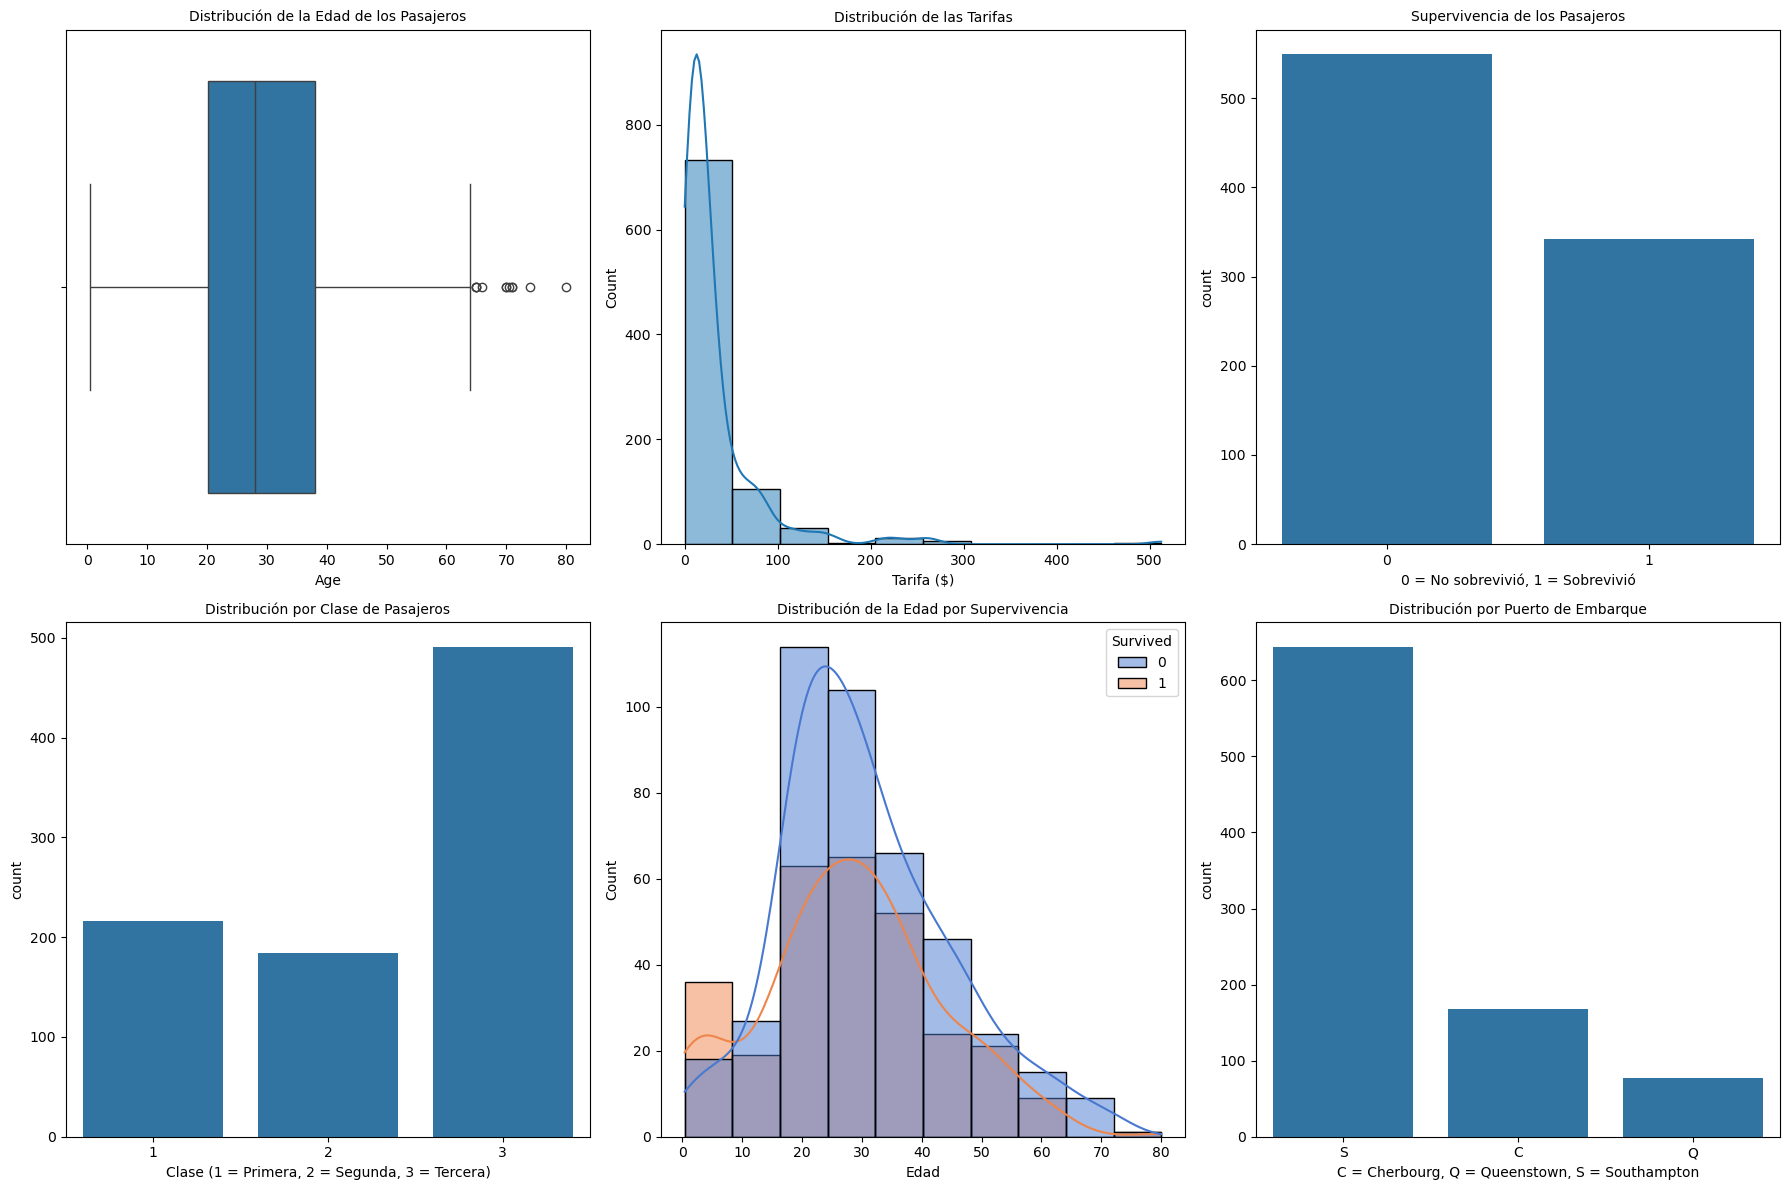

In [12]:
# Configuración del tamaño de la figura
plt.figure(figsize=(18, 12))

# Boxplot de la edad
plt.subplot(2, 3, 1)
sns.boxplot(x=data['Age'])
plt.title('Distribución de la Edad de los Pasajeros', fontsize=10)

# Histograma de la tarifa
plt.subplot(2, 3, 2)
sns.histplot(data['Fare'], bins=10, kde=True)
plt.title('Distribución de las Tarifas', fontsize=10)
plt.xlabel('Tarifa ($)')

# Conteo de sobrevivientes
plt.subplot(2, 3, 3)
sns.countplot(x=data['Survived'])
plt.title('Supervivencia de los Pasajeros', fontsize=10)
plt.xlabel('0 = No sobrevivió, 1 = Sobrevivió')

# Conteo por clases de pasajeros
plt.subplot(2, 3, 4)
sns.countplot(x=data['Pclass'])
plt.title('Distribución por Clase de Pasajeros', fontsize=10)
plt.xlabel('Clase (1 = Primera, 2 = Segunda, 3 = Tercera)')

# Histograma de edad segmentado por supervivencia
plt.subplot(2, 3, 5)
sns.histplot(data=data, x='Age', hue='Survived', bins=10, kde=True, palette='muted')
plt.title('Distribución de la Edad por Supervivencia', fontsize=10)
plt.xlabel('Edad')

# Conteo de pasajeros por puerto de embarque
plt.subplot(2, 3, 6)
sns.countplot(x=data['Embarked'])
plt.title('Distribución por Puerto de Embarque', fontsize=10)
plt.xlabel('C = Cherbourg, Q = Queenstown, S = Southampton')

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [22]:
from IPython.display import display, HTML

display(HTML("<h2 style='font-size:20px;'>Revisión de Datos Faltantes y Registros Específicos</h2>"))

print("Cantidad de valores faltantes por columna:")
print(data.isnull().sum())

print("\nCantidad de registros con valores específicos:")
print("Edad igual a 0: ", data['Age'].isin([0]).sum())
print("Tarifa igual a 0: ", data['Fare'].isin([0]).sum())
print("Hermanos/pareja a bordo igual a 0: ", data['SibSp'].isin([0]).sum())
print("Padres/hijos a bordo igual a 0: ", data['Parch'].isin([0]).sum())


Cantidad de valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cantidad de registros con valores específicos:
Edad igual a 0:  0
Tarifa igual a 0:  15
Hermanos/pareja a bordo igual a 0:  608
Padres/hijos a bordo igual a 0:  678


In [38]:
from IPython.display import display, HTML

display(HTML("<h2 style='font-size:20px;'>Datos Atípicos</h2>"))

edad_minima = 0
edad_maxima = 80
total_atipicos_edad = ((data['Age'] < edad_minima) | (data['Age'] > edad_maxima)).sum()
print("El total de datos atípicos en la columna 'Age' (Edad) es {}".format(total_atipicos_edad))

tarifa_minima = 0
tarifa_maxima = 500
total_atipicos_tarifa = ((data['Fare'] < tarifa_minima) | (data['Fare'] > tarifa_maxima)).sum()
print("El total de datos atípicos en la columna 'Fare' (Tarifa) es {}".format(total_atipicos_tarifa))


El total de datos atípicos en la columna 'Age' (Edad) es 0
El total de datos atípicos en la columna 'Fare' (Tarifa) es 3


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
display(HTML("<h2 style='font-size:20px;'>Personas con condiciones cardiacas</h1>"))
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [68]:
data[['Survived']].head(10)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [70]:
X = data.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna condition 
Y = data['Survived'] # Se cargan los datos de train con los datos de la la columna condition

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [88]:
display(HTML("<h2 style='font-size:20px;'>Datos de entrenamiento</h1>"))

print(X_train)

     PassengerId  Pclass        Age  SibSp  Parch     Fare  Sex_female  \
671          672       0  31.000000      1      0  52.0000       False   
417          418       1  18.000000      0      2  13.0000        True   
634          635       2   9.000000      3      2  27.9000        True   
323          324       1  22.000000      1      1  29.0000        True   
379          380       2  19.000000      0      0   7.7750       False   
..           ...     ...        ...    ...    ...      ...         ...   
131          132       2  20.000000      0      0   7.0500       False   
490          491       2  29.796842      1      0  19.9667       False   
528          529       2  39.000000      0      0   7.9250       False   
48            49       2  29.796842      2      0  21.6792       False   
80            81       2  22.000000      0      0   9.0000       False   

     Sex_male  Embarked_C  Embarked_Q  Embarked_S  
671      True       False       False        True  
417    

### Muestro si hay datos nulos para limpiarlos

In [91]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


### Reemplazo los datos nulos por la media

In [94]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

### Entrenamiento y testeo del modelo

In [99]:

modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit(X_train, Y_train)

Prediccion = modelo_regresion.predict(X_test)
print (Y_test)
print (Prediccion)

288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0]


### Desempeño del modelo

In [102]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       137
           1       0.76      0.63      0.69        86

    accuracy                           0.78       223
   macro avg       0.78      0.75      0.76       223
weighted avg       0.78      0.78      0.78       223



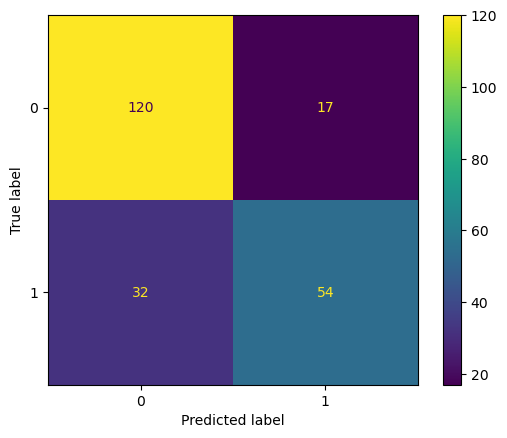

In [104]:
display(HTML("<h2 style='font-size:20px;'>Gráficas</h1>"))
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

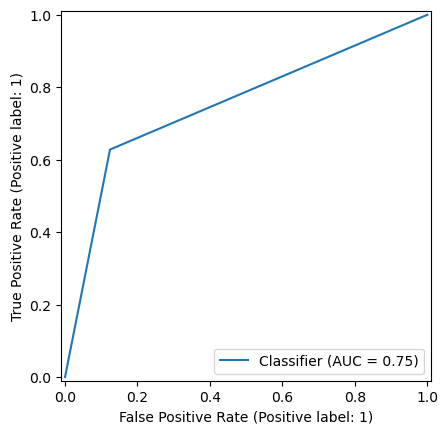

In [106]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

### Desempeño del Modelo
**Precisión**
La precisión indica el porcentaje de predicciones correctas para las instancias positivas en comparación con todas las predicciones positivas realizadas por el modelo.

- Ejemplo: Si el modelo tiene una precisión de 0.79 para la clase "no sobrevivió" (0), significa que el 79% de las instancias predichas como "no sobrevivieron" son correctas. Para la clase "sobrevivió" (1), la precisión es de 0.76, lo que indica que el 76% de las predicciones de sobrevivientes fueron correctas.


**Recall (Sensibilidad)**
El recall mide la proporción de verdaderos positivos sobre todas las instancias realmente positivas en el conjunto de datos.

- Ejemplo: Un recall de 0.88 para la clase "no sobrevivió" (0) significa que el modelo identificó correctamente el 88% de todas las personas que no sobrevivieron. Para la clase "sobrevivió" (1), un recall de 0.63 indica que el modelo solo identificó correctamente el 63% de las personas que realmente sobrevivieron.


**F1 Score**
El F1 score es la media armónica entre precisión y recall, proporcionando una métrica equilibrada de ambos aspectos.

- Ejemplo: El F1 score de 0.83 para la clase "no sobrevivió" (0) indica un buen equilibrio entre precisión y recall. Para la clase "sobrevivió" (1), un F1 score de 0.69 sugiere que el modelo tiene un rendimiento equilibrado, pero con margen de mejora en la predicción de sobrevivientes.


**Exactitud (Accuracy)**
La exactitud es el porcentaje total de predicciones correctas del modelo sobre el total de instancias.

- Ejemplo: Un accuracy de 0.78 significa que el modelo acertó en el 78% de las predicciones.


**Promedio Macro y Ponderado**
El promedio macro y ponderado ofrecen una visión global del rendimiento del modelo, teniendo en cuenta las diferencias de tamaño entre las clases.

- Ejemplo: El promedio macro de precisión es de 0.78, lo que indica un rendimiento equilibrado en todas las clases sin ponderar el desequilibrio de clases. El promedio ponderado de precisión es de 0.78, lo que refleja un buen rendimiento considerando el tamaño de las clases.